transaction_id : 아파트 거래에 대한 유니크한 아이디

apartment_id : 아파트 아이디

city : 도시

dong : 동

jibun : 지번

apt : 아파트단지 이름

addr_kr : 주소

exclusive_use_area : 전용면적

year_of_completion : 설립일자

transaction_year_month : 거래년월

transaction_date : 거래날짜

floor : 층

transaction_real_price : 실거래가 (target variable)

# 데이터 확인

In [ ]:
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
import timeit # time measure
import sklearn # modeling
import warnings
warnings.filterwarnings("ignore")
import sys
%matplotlib inline
import re
import warnings
import pylab as pl
from scipy.stats import mode

test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
submission = pd.read_csv("submission.csv")

In [ ]:
pd.options.display.max_rows = 99

In [ ]:
display(train,test,submission)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.8200,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.1700,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.7400,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.3900,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.4300,2004,200801,21~31,3,120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216548,1234823,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,59.8245,2012,201711,11~20,3,22000
1216549,1234824,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,7,30750
1216550,1234825,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,9,29500
1216551,1234826,9586,부산광역시,정관읍 용수리,1364,정관신도시롯데캐슬,정관읍 용수리 1364 정관신도시롯데캐슬,101.7400,2008,201711,21~30,7,26700


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21
...,...,...,...,...,...,...,...,...,...,...,...,...
5458,1174640,8965,서울특별시,양재동,15-9,위너스,양재동 15-9 위너스,84.0500,2003,201710,11~20,7
5459,1175575,3831,서울특별시,반포동,18-1,래미안퍼스티지,반포동 18-1 래미안퍼스티지,84.9300,2009,201712,1~10,4
5460,1157024,5550,서울특별시,구로동,256-1,삼성래미안,구로동 256-1 삼성래미안,110.1880,2004,201712,21~31,23
5461,1136863,3371,서울특별시,홍제동,24-16,동양드림,홍제동 24-16 동양드림,92.4400,2005,201710,21~31,1


,transaction_id,transaction_real_price
0,1145756,0
1,1198704,0
2,1222384,0
3,1179897,0
4,1223091,0
...,...,...
5458,1174640,0
5459,1175575,0
5460,1157024,0
5461,1136863,0


In [ ]:
train_null = train.drop("transaction_real_price", axis = 1).isnull().sum()/len(train.isnull().sum()) # 나중에 데이터프레임으로 묶어줘야되기에 train,test의 컬럼수가 동일해야되기때문에 train데이터에서 transaction_real_price컬럼을 뺀다.
#train_null
test_null = test.isnull().sum()/len(test.isnull().sum())
#test_null
pd.DataFrame({"train_null" : train_null, "test_null" : test_null}) # 데이터프레임 형태로 바꿔줌

,train_null,test_null
transaction_id,0.0,0.0
apartment_id,0.0,0.0
city,0.0,0.0
dong,0.0,0.0
jibun,0.0,0.0
apt,0.0,0.0
addr_kr,0.0,0.0
exclusive_use_area,0.0,0.0
year_of_completion,0.0,0.0
transaction_year_month,0.0,0.0


# Target variable
## transaction_real_price : 실거래가

In [ ]:
train['transaction_real_price'].describe()

count    1.216553e+06
mean     3.822769e+04
std      3.104898e+04
min      1.000000e+02
25%      1.900000e+04
50%      3.090000e+04
75%      4.700000e+04
max      8.200000e+05
Name: transaction_real_price, dtype: float64

Skewness : %s , Kurtosis : %s (3.4071692420405535, 24.839820787251245)


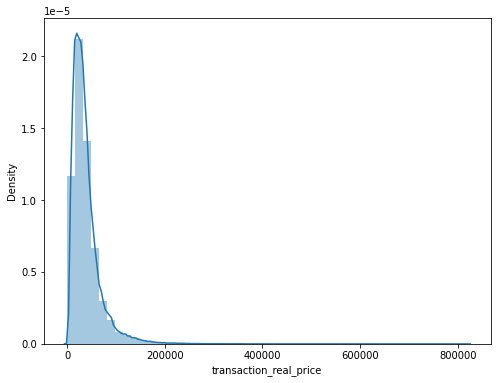

In [ ]:
f,ax = plt.subplots(figsize = (8,6))
sns.distplot(train['transaction_real_price'])
print("Skewness : %s , Kurtosis : %s",(train['transaction_real_price'].skew(),train['transaction_real_price'].kurt())) # 왜도 - skew(), 첨도 - kurt()

- 왜도(Skewness) : 왼쪽으로 치우쳐져 있을수록 값이크고, 오른쪽으로 치우쳐져 있을 수록 값이 작아진다. 즉, 0에 가까울수록 좋은 형태

- 첨도(Kurtosis) : 첨도 값이 3에 가까울 경우 정규분포에 가까우며, 첨도 값이 클수록 뾰족하고 값이 작을 수록 완만해진다

Skewness : %f , Kurtosis : %f (-0.09493151731286435, 0.24886558181939034)


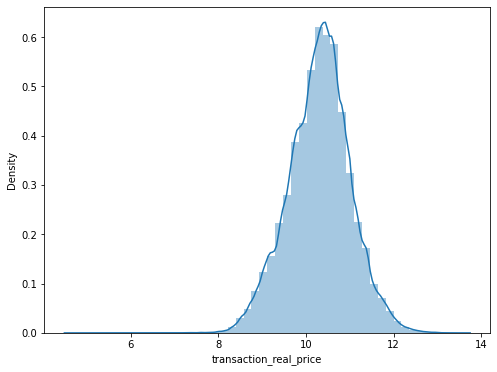

In [ ]:
train['transaction_real_price'] = np.log1p(train['transaction_real_price']) # np.log1p(z) = log(1+z)
print("Skewness : %f , Kurtosis : %f",(train['transaction_real_price'].skew(),train['transaction_real_price'].kurt()))
f,ax = plt.subplots(figsize = (8,6))
sns.distplot(train['transaction_real_price'])

# Columns 상관관계

In [ ]:
#cols = corrmat.nlargest(k, 'transaction_real_price')['transaction_real_price'].index
#cols
#cm = np.corrcoef(train[cols].values.T)
#cm

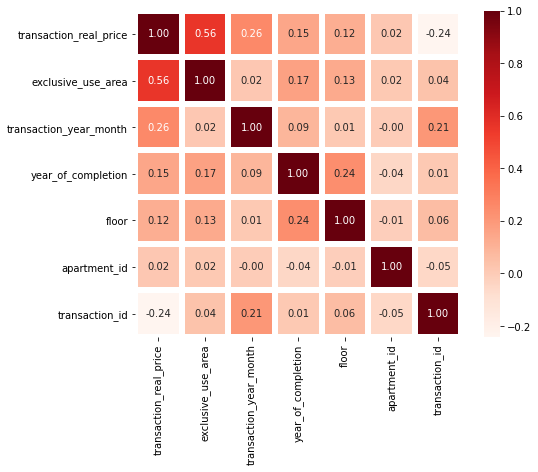

In [ ]:
k = train.shape[1]
corrmat = train.corr()
cols = corrmat.nlargest(k, 'transaction_real_price')['transaction_real_price'].index #nlargest(N,내부) - 내부에서 상위에 N개만 추출
cm = np.corrcoef(train[cols].values.T) #상관계수 구하기
f,ax = plt.subplots(figsize = (8,6))
sns.heatmap(data = cm, annot=True, square= True, fmt= '.2f', linewidths= 5, cmap ='Reds', yticklabels= cols.values, xticklabels= cols.values)

# Numeric Variable
## transaction_id & apartment_id : 거래id & 아파트 id

In [ ]:
len(train['apartment_id'].unique()) # 12533개로 겹치는 부분이 상당히 많은것을 알 수 있다.

12533

In [ ]:
train_id = train['transaction_id']
train = train.drop('transaction_id',axis =1)
test_id = test['transaction_id']
test = test.drop('transaction_id',axis =1)

# floor : 층

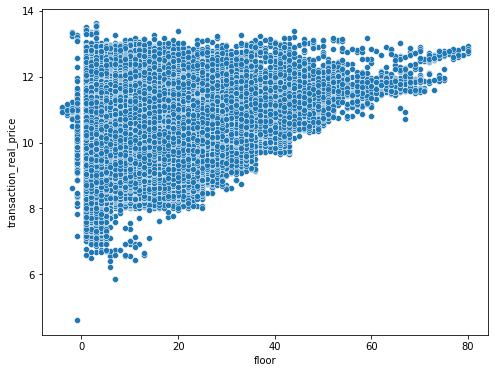

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(train['floor'],train['transaction_real_price']) # plt.scatter() -> sns.scatterplot()

In [ ]:
# train[(train['floor']<0)&(train['floor']<6)] #이상치 확인

Skewness: %f, Kurtosis: %f (1.3247097550477565, 3.7966033670123065)


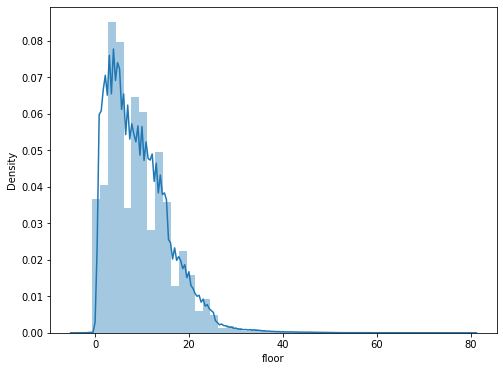

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['floor'])
print("Skewness: %f, Kurtosis: %f",(train['floor'].skew(),train['floor'].kurt()))

# exclusive_use_area : 전용 면적

In [ ]:
train['exclusive_use_area'].describe()

count    1.216553e+06
mean     7.816549e+01
std      2.915113e+01
min      9.260000e+00
25%      5.976000e+01
50%      8.241000e+01
75%      8.497000e+01
max      4.243200e+02
Name: exclusive_use_area, dtype: float64

# exclusive_use_area : 전용 면적(시각화)

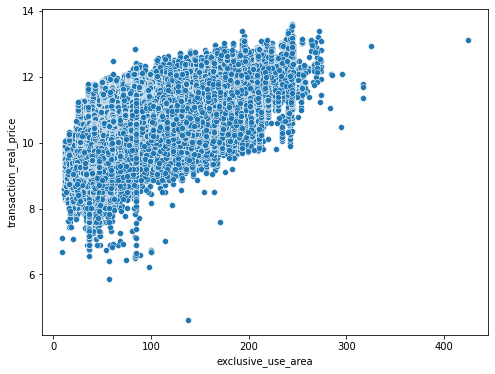

In [ ]:
f,ax = plt.subplots(figsize = (8,6))
sns.scatterplot(train['exclusive_use_area'],train['transaction_real_price'])

In [ ]:
train[train['exclusive_use_area']>400] # 위 시각화에서 가장 많이 벗어나 보이는 이상치를 탐색

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
563870,12633,서울특별시,도곡동,193-1,힐데스하임빌라,도곡동 193-1 힐데스하임빌라,424.32,1998,201604,11~20,10,13.118357


In [ ]:
train[(train['exclusive_use_area']<150)&(train['transaction_real_price']<6)] # 두 이상치 모두 아무 이상이 없어 보임

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
312119,10853,서울특별시,신월동,128,태헌(신월프라자),신월동 128 태헌(신월프라자),56.97,1999,201005,21~31,7,5.860786
722888,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,138.25,1974,201606,21~30,-1,4.615121


Skewness: %f, Kurtosis: %f (1.2275090586886344, 3.1005174479571935)


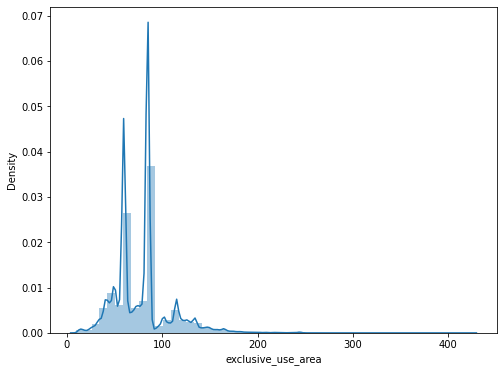

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['exclusive_use_area'])
print("Skewness: %f, Kurtosis: %f",(train['exclusive_use_area'].skew(), train['exclusive_use_area'].kurt()))

# transaction_year_month : 거래 년, 월

In [ ]:
all_data = [train,test]

for dataset in all_data:
  dataset['transaction_year_month'] = dataset['transaction_year_month'].astype(str)
  dataset['year'] = dataset['transaction_year_month'].str[:4].astype(int) # year - 0~3
  dataset['month'] = dataset['transaction_year_month'].str[4:6].astype(int) # month - 4~6
  dataset['transaction_year_month'] = dataset['transaction_year_month'].astype(int)

In [ ]:
train['year']

0          2008
1          2008
2          2008
3          2008
4          2008
           ... 
1216548    2017
1216549    2017
1216550    2017
1216551    2017
1216552    2017
Name: year, Length: 1216553, dtype: int64

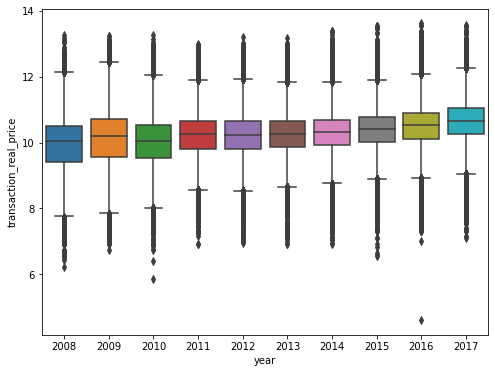

In [ ]:
f,ax = plt.subplots(figsize = (8,6))
sns.boxplot(train['year'],train['transaction_real_price'])

In [ ]:
train[(train['year']==2016) & (train['transaction_real_price']<6)] # 위 시각화에서 가장 멀리있는 이상치 확인
# apt = '서면', floor에 -1이 적혀있다.

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
722888,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,138.25,1974,201606,21~30,-1,4.615121,2016,6


In [ ]:
train[train['apt']=='서면']

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
695725,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201105,21~31,3,8.682877,2011,5
696834,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201108,21~31,1,8.922792,2011,8
700884,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,88.93,1974,201206,1~10,1,10.126671,2012,6
702589,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201212,21~31,5,8.699681,2012,12
702876,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201301,11~20,4,8.909370,2013,1
703979,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201304,1~10,1,8.853808,2013,4
711024,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201407,21~31,5,8.853808,2014,7
712441,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201410,21~31,3,9.082621,2014,10
713864,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201501,1~10,4,8.955577,2015,1
721684,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201604,1~10,1,9.059634,2016,4


In [ ]:
train[train['floor']==-1].sort_values("transaction_real_price")

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
722888,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,138.250,1974,201606,21~30,-1,4.615121,2016,6
651052,1514,부산광역시,대청동4가,75-176,근영빌라2동,대청동4가 75-176 근영빌라2동,47.170,1996,200809,21~30,-1,7.170888,2008,9
651087,1513,부산광역시,대청동4가,75-181,근영빌라1동,대청동4가 75-181 근영빌라1동,59.890,1996,200810,11~20,-1,7.824446,2008,10
651641,1514,부산광역시,대청동4가,75-176,근영빌라2동,대청동4가 75-176 근영빌라2동,47.170,1996,201101,21~31,-1,8.071219,2011,1
674249,9764,부산광역시,동삼동,213-19,조은아크로빌,동삼동 213-19 조은아크로빌,46.800,2001,201506,11~20,-1,8.160804,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537384,10310,서울특별시,청담동,102-13,청담파라곤Ⅱ 2단지,청담동 102-13 청담파라곤Ⅱ 2단지,241.880,2010,201012,11~20,-1,12.577640,2010,12
1095417,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,212.524,2011,201705,21~31,-1,13.081543,2017,5
1095416,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,212.524,2011,201705,21~31,-1,13.102163,2017,5
23585,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,240.230,2011,201612,1~10,-1,13.204866,2016,12


# year_of_completion : 설립일자

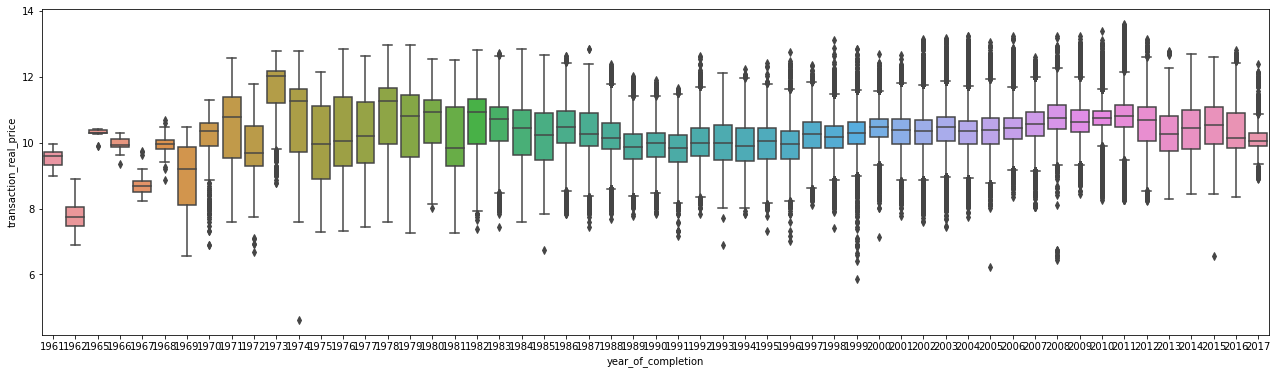

In [ ]:
f,ax = plt.subplots(figsize = (22,6))
sns.boxplot(train['year_of_completion'],train['transaction_real_price'])

In [ ]:
train[train['transaction_real_price']<5]

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
722888,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,138.25,1974,201606,21~30,-1,4.615121,2016,6


# Catergorical Variable
## city : 도시

In [ ]:
# 라벨링
replace_name = {'서울특별시' : 0, '부산광역시' : 1 }
train = train.replace({'city' : replace_name})
test = test.replace({'city' : replace_name})

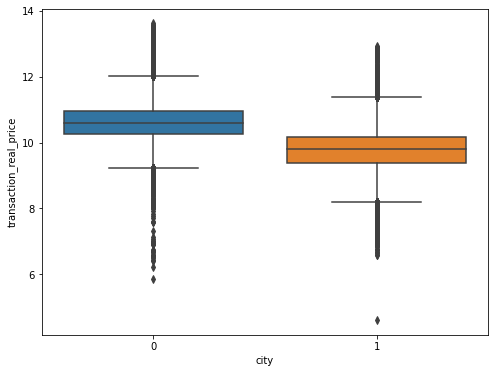

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.boxplot(train['city'], train['transaction_real_price'])

## addr_kr : 주소

- addr_kr 은 동 지번 아파트단지를 모두 합친 것이므로 불필요 삭제

In [ ]:
train = train.drop('addr_kr', axis=1)
test = test.drop('addr_kr', axis=1)

# dong : 동

In [ ]:
# 한강 유무에 따른 컬럼 생성
train['hangang']=train['dong'].isin(['성수동1가','삼성동','이촌동','공덕동','서교동','한강로3가','목동']).astype(int)
test['hangang']=test['dong'].isin(['성수동1가','삼성동','이촌동','공덕동','서교동','한강로3가','목동']).astype(int)

In [ ]:
len(train['dong'].unique())

473

- 동은 그 지역을 그룹화 한것으로 지역에 따라 아파트 가격차이가 날 수 있다.
따라서 아프트 실거래가의 평균순으로 데이터를 라벨링 한다.

In [ ]:
group_dong = train[['transaction_real_price','dong']].groupby('dong').mean().sort_values('transaction_real_price').reset_index()
group_dong.head()

,dong,transaction_real_price
0,신선동3가,8.543619
1,봉래동5가,8.590871
2,장안읍 명례리,8.597728
3,신창동2가,8.601466
4,신선동2가,8.622581


In [ ]:
dong_num = { }
for i in range(len(group_dong)):
  dong = group_dong['dong'].iloc[i]
  dong_num[dong] = i

dong_num

{'가락동': 391,
 '가리봉동': 159,
 '가산동': 167,
 '가야동': 94,
 '가양동': 210,
 '갈월동': 362,
 '갈현동': 169,
 '감만동': 29,
 '감전동': 47,
 '감천동': 46,
 '강일동': 311,
 '개금동': 70,
 '개봉동': 242,
 '개포동': 432,
 '거여동': 281,
 '거제동': 162,
 '견지동': 453,
 '고덕동': 388,
 '고척동': 222,
 '공덕동': 401,
 '공릉동': 192,
 '공항동': 279,
 '광안동': 84,
 '광장동': 415,
 '괘법동': 115,
 '괴정동': 66,
 '교남동': 465,
 '교북동': 280,
 '구기동': 327,
 '구로동': 194,
 '구산동': 191,
 '구서동': 144,
 '구수동': 321,
 '구의동': 387,
 '구평동': 35,
 '구포동': 65,
 '군자동': 316,
 '궁동': 204,
 '금곡동': 37,
 '금사동': 49,
 '금호동1가': 332,
 '금호동2가': 426,
 '금호동3가': 355,
 '금호동4가': 404,
 '기장읍 교리': 58,
 '기장읍 내리': 160,
 '기장읍 대라리': 42,
 '기장읍 대변리': 13,
 '기장읍 동부리': 50,
 '기장읍 서부리': 17,
 '기장읍 청강리': 41,
 '길동': 243,
 '길음동': 319,
 '낙민동': 136,
 '낙원동': 174,
 '남가좌동': 324,
 '남대문로5가': 466,
 '남부민동': 82,
 '남산동': 71,
 '남산동2가': 250,
 '남창동': 110,
 '남천동': 215,
 '남항동1가': 131,
 '남항동2가': 122,
 '남항동3가': 15,
 '남현동': 317,
 '내곡동': 443,
 '내발산동': 304,
 '내수동': 462,
 '냉천동': 383,
 '노고산동': 129,
 '노량진동': 312,
 '녹번동': 251,
 '녹산동': 128,
 '논현동': 4

In [ ]:
train = train.replace({'dong' : dong_num}) # replace()로 라벨링
test = test.replace({'dong' : dong_num}) # 동일하게
train.head()

,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month,hangang
0,7622,0,351,6-13,신현(101동),84.82,2002,200801,21~31,2,10.532123,2008,1,0
1,5399,0,414,142,사직파크맨션,99.17,1973,200801,1~10,6,9.903538,2008,1,0
2,3578,0,414,174-1,두레엘리시안,84.74,2007,200801,1~10,6,10.558439,2008,1,0
3,10957,0,462,95,파크팰리스,146.39,2003,200801,11~20,15,11.678448,2008,1,0
4,10639,0,462,110-15,킹스매너,194.43,2004,200801,21~31,3,11.695255,2008,1,0


# Jibun : 지번

In [ ]:
len(train['jibun'].unique())

8961

- 지번은 unique가 동 과는 다르게 너무 많아서 라벨링을 시키면 unique가 너무 많아져서 하지않는다.

In [ ]:
group_jibun = train[['transaction_real_price','jibun']].groupby('jibun').mean().sort_values('transaction_real_price').reset_index()
group_jibun.head()

,jibun,transaction_real_price
0,산3-148,7.225286
1,737-1,7.494417
2,741-1,7.498174
3,1181-4,7.585491
4,11-174,7.601402


In [ ]:
jibun_num = { }
for i in range(len(group_jibun)):
  jibun = group_jibun['jibun'].iloc[i]
  jibun_num[jibun] = i

jibun_num

{'산3-148': 0,
 '737-1': 1,
 '741-1': 2,
 '1181-4': 3,
 '11-174': 4,
 '1175-1': 5,
 '1161-7': 6,
 '1186-1': 7,
 '1173-3': 8,
 '745-70': 9,
 '13-1105': 10,
 '92-326': 11,
 '1005-1': 12,
 '293-7': 13,
 '728-3': 14,
 '201-10': 15,
 '460-2': 16,
 '92-316': 17,
 '1056-7': 18,
 '591-4': 19,
 '132-3': 20,
 '532-9': 21,
 '734-4': 22,
 '74-18': 23,
 '75-176': 24,
 '62-1': 25,
 '865-32': 26,
 '716-12': 27,
 '116-15': 28,
 '243-1': 29,
 '1594-1': 30,
 '16-290': 31,
 '산20-1': 32,
 '515-27': 33,
 '177-74': 34,
 '96-24': 35,
 '250-1995': 36,
 '1585-1': 37,
 '1781-80': 38,
 '1293-11': 39,
 '54-11': 40,
 '1299-8': 41,
 '515-29': 42,
 '410-5': 43,
 '775-4': 44,
 '865-42': 45,
 '797-38': 46,
 '91-1': 47,
 '595-40': 48,
 '189-77': 49,
 '169-7': 50,
 '717-2': 51,
 '47-6': 52,
 '20-125': 53,
 '252-3': 54,
 '36-4': 55,
 '524-1': 56,
 '409-1': 57,
 '1405-10': 58,
 '75-181': 59,
 '199-24': 60,
 '1073-1': 61,
 '산96-6': 62,
 '796-27': 63,
 '44-151': 64,
 '1051-1': 65,
 '177-183': 66,
 '737-7': 67,
 '89-16': 68,


# apt : 아파트
- 아파트의 경우는 중복데이터가 너무 많기에 그룹화로 라벨링을 시키면 중복데이터가 너무 많아지므로 하지않는다.

In [ ]:
len(train['apt'].unique())

10440

In [ ]:
group_apt = train[['transaction_real_price','apt']].groupby('apt').mean().sort_values('transaction_real_price').reset_index()
group_apt.head()

,apt,transaction_real_price
0,좌천시민(737-1),7.494417
1,좌천시민(741-1),7.498174
2,수정(1181-4),7.585491
3,수정(1175-1),7.626830
4,수정(1186-1),7.685623


# transaction_date : 거래 일자

In [ ]:
train['transaction_date']

0          21~31
1           1~10
2           1~10
3          11~20
4          21~31
           ...  
1216548    11~20
1216549    21~30
1216550    21~30
1216551    21~30
1216552    21~30
Name: transaction_date, Length: 1216553, dtype: object

In [ ]:
# 처음 거래시작한 날과 거래가 끝난 날의 차이를 거래길이를 나타내는 컬럼을 만들어줌
train['day_diff'] = train['transaction_date'].str.extract('(~\d+)')[0].str[1:].astype(int) - train['transaction_date'].str.extract('(\d+~)')[0].str[:-1].astype(int)
test['day_diff'] = test['transaction_date'].str.extract('(~\d+)')[0].str[1:].astype(int) - test['transaction_date'].str.extract('(\d+~)')[0].str[:-1].astype(int)

In [ ]:
group_date = train[['transaction_real_price','transaction_date']].groupby('transaction_date').mean().sort_values('transaction_real_price').reset_index()
group_date.head()

,transaction_date,transaction_real_price
0,21~29,10.176453
1,21~28,10.286294
2,1~10,10.293390
3,11~20,10.306731
4,21~31,10.318796


In [ ]:
date_num = {}
for i in range(len(group_date)):
    date = group_date['transaction_date'].iloc[i]
    date_num[date] = i
    
date_num

{'11~20': 3, '1~10': 2, '21~28': 1, '21~29': 0, '21~30': 5, '21~31': 4}

In [ ]:
train = train.replace({'transaction_date' : date_num})
test = test.replace({'transaction_date' : date_num})
train.head()

,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month,hangang,day_diff
0,7622,0,351,6-13,신현(101동),84.82,2002,200801,4,2,10.532123,2008,1,0,10
1,5399,0,414,142,사직파크맨션,99.17,1973,200801,2,6,9.903538,2008,1,0,9
2,3578,0,414,174-1,두레엘리시안,84.74,2007,200801,2,6,10.558439,2008,1,0,9
3,10957,0,462,95,파크팰리스,146.39,2003,200801,3,15,11.678448,2008,1,0,9
4,10639,0,462,110-15,킹스매너,194.43,2004,200801,4,3,11.695255,2008,1,0,10


# Preprocessing
- floor 같은 경우 -값이 존재하기 때문에 log를 취하기 전에 각 값에 +5를 하면서 모든 값을 양수로 만들어줍니다.


In [ ]:
train['floor'].value_counts() # -1 부터 -4 까지의 값이 있기에 5를 더해줘 모든 값을 양수로 바꿔줌

 5     88676
 4     88399
 3     85549
 2     82589
 1     74927
 6     74236
 7     70113
 8     66771
 9     65272
 10    63494
 11    60065
 12    57746
 13    52240
 14    49041
 15    45782
 16    27472
 17    26231
 18    24446
 19    21476
 20    18859
 21    13654
 22    12080
 23    10377
 24     8730
 25     7098
 26     3052
 27     2719
 28     2212
 29     1792
 30     1461
 31     1148
 32     1045
 33      984
 34      891
 35      791
 36      629
 37      537
 38      447
 39      388
 40      338
 41      289
 42      287
 43      251
 44      208
 45      204
 46      198
 47      164
 48      147
-1       140
 49      113
 50       92
 51       88
 52       52
 54       49
 58       43
 57       41
 53       39
 55       34
 60       28
 64       26
 59       23
 70       23
 62       22
 66       21
 56       20
 65       20
 68       19
 61       18
 69       17
-2        17
 63       17
 67       13
 72       11
 74       10
 73        9
 71        7
 75        7

Skewness: 0.089636, Kurtosis: -0.640885


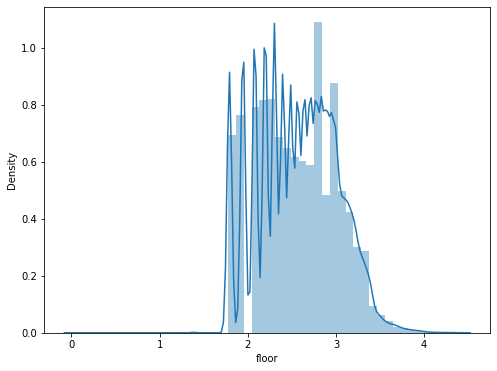

In [ ]:
train['floor'] = np.log(train['floor']+5) # log를 취하기전 5를 더해줌
test['floor'] = np.log(test['floor']+5) # 동일하게
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['floor'])
print("Skewness: %f, Kurtosis: %f" %  (train['floor'].skew(),train['floor'].kurt()))

In [ ]:
drop_columns = ['apt', 'jibun', 'transaction_year_month']

train = train.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis=1)

In [ ]:
train.head()

,apartment_id,city,dong,exclusive_use_area,year_of_completion,transaction_date,floor,transaction_real_price,year,month,hangang,day_diff
0,7622,0,351,84.82,2002,4,1.945910,10.532123,2008,1,0,10
1,5399,0,414,99.17,1973,2,2.397895,9.903538,2008,1,0,9
2,3578,0,414,84.74,2007,2,2.397895,10.558439,2008,1,0,9
3,10957,0,462,146.39,2003,3,2.995732,11.678448,2008,1,0,9
4,10639,0,462,194.43,2004,4,2.079442,11.695255,2008,1,0,10


# Feature Engineering

- 재건축 유뮤를 판단하는 컬럼 생성

In [ ]:
all_data = [train,test]
for dataset in all_data:
  dataset['age'] = dataset['year'] - dataset['year_of_completion'] # 거래년도 - 설립연도
  dataset['is_rebuild'] = (dataset['age']>=30).astype(int) # 30년이상인것은 일반적으로 재건축건물

- 정규분포모형을 가질 수 있도록 왜도가 1 이상 & 첨도가 3 이상인것은 조정 할 필요가 있다.

In [ ]:
train_columns = []
for column in train.columns[:]:
    if train[column].skew() >= 1:
        print("%s -> Skewness: %f, Kurtosis: %f" %  (column,train[column].skew(),train[column].kurt()))
        train_columns.append(column)
    elif train[column].kurt() >= 3:
        print("%s -> Skewness: %f, Kurtosis: %f" %  (column,train[column].skew(),train[column].kurt()))
        train_columns.append(column)

exclusive_use_area -> Skewness: 1.227509, Kurtosis: 3.100517
hangang -> Skewness: 6.358349, Kurtosis: 38.428662
day_diff -> Skewness: -0.589751, Kurtosis: 4.573129
is_rebuild -> Skewness: 3.324832, Kurtosis: 9.054522


In [ ]:
#정규분포모형을 가질 수 있도록 첨도와 왜도를 조정
#조정하는 방법에는 square root, quarter root, log 등이 있다.
#log에서 0의 값이 들어왔을 때 무한으로 가는 것을 방지하도록 1 더해주는 log1p를 사용

for column in train_columns :
    train[column] = np.log1p(train[column])
    test[column] = np.log1p(test[column])
    print("%s -> Skewness: %f, Kurtosis: %f" %  (column,train[column].skew(),train[column].kurt()))

exclusive_use_area -> Skewness: -0.438156, Kurtosis: 1.744119
hangang -> Skewness: 6.358349, Kurtosis: 38.428662
day_diff -> Skewness: -1.128137, Kurtosis: 6.788569
is_rebuild -> Skewness: 3.324832, Kurtosis: 9.054522


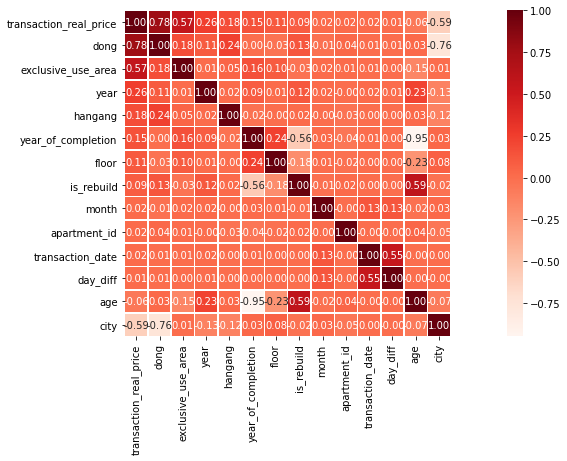

In [ ]:
#상관관계 확인
k=train.shape[1] #히트맵 변수 갯수
corrmat = train.corr() #변수간의 상관관계
cols = corrmat.nlargest(k, 'transaction_real_price')['transaction_real_price'].index #price기준으로 제일 큰순서대로 20개를 뽑아냄
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(data = cm, annot=True, square=True, fmt = '.2f', linewidths=.5, cmap='Reds',yticklabels = cols.values, xticklabels = cols.values)

In [ ]:
# LabelEncoder 라벨링
for col in train.columns:
  if train[col].dtype == "object":
    label = LabelEncoder()
    train[col] = label.fit_transform(train[col])

for col in test.columns:
  if test[col].dtype == "object":
    label = LabelEncoder()
    test[col] = label.fit_transform(test[col])

In [ ]:
target = train['transaction_real_price']

In [ ]:
train = train.drop('transaction_real_price',axis=1)

In [ ]:
train.shape, test.shape

((1216553, 13), (5463, 13))

# Modeling

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
pip install catboost

     |████████████████████████████████| 66.2MB 56kB/s 


In [ ]:
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

In [ ]:
#cross validation score
n_folds = 2

def cv_score(models):
    kfold = KFold(n_splits=n_folds, shuffle=True ,random_state=42).get_n_splits(train.values)
    for m in models:
        cvs = np.mean(cross_val_score(m['model'], train.values, target, cv=kfold))
        rmse = np.mean(np.sqrt(-cross_val_score(m['model'], train.values, np.expm1(target), scoring = "neg_mean_squared_error", cv = kfold)))
        print("Model {} CV score : {:.4f}".format(m['name'], cvs))
        print("RMSE : {:.4f}".format(rmse))


In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state=42))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=42))
gboost = GradientBoostingRegressor(random_state=42)
forest = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state=42)
xgboost = xgb.XGBRegressor(random_state=42)
lightgbm = lgb.LGBMRegressor(random_state=42, num_leaves = 100, min_data_in_leaf = 15, max_depth=6,
                            learning_rate = 0.1, min_child_samples = 30, feature_fraction=0.9, bagging_freq= 1,
                            bagging_fraction = 0.9, bagging_seed = 11, lambda_l1 = 0.1, verbosity = -1 )
catboost = CatBoostClassifier(bootstrap_type='Bernoulli', random_seed = 42, n_estimators = 100, learning_rate = 0.1, subsample = 0.8)

models = [{'model': gboost, 'name':'GradientBoosting'}, {'model': xgboost, 'name':'XGBoost'},
          {'model': lightgbm, 'name':'LightGBM'}, {'model' : lasso, 'name' : 'LASSO Regression'}, 
          {'model' : ENet, 'name' : 'Elastic Net Regression'}, {'model' : forest, 'name' : 'RandomForset'}]

In [ ]:
start = timeit.default_timer() # start
cv_score(models) # 총 모델들 교차검증
stop = timeit.default_timer() # stop
print('불러오는데 걸린 시간 : {}초'.format(stop - start)) # 모델 작동 걸린 시간(stop-start) 확인

Model GradientBoosting CV score : 0.5817
RMSE : 15799.0451
[05:02:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:03:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model XGBoost CV score : 0.5947
RMSE : 15868.0485
Model LightGBM CV score : 0.6131
RMSE : 14330.6681
Model LASSO Regression CV score : 0.6842
RMSE : 19852.5360
Model Elastic Net Regression CV score : 0.6841
RMSE : 19848.9725
Model RandomForset CV score : 0.5636
RMSE : 15188.2729
불러오는데 걸린 시간 : 1876.740792484초


- xgboost, lightgbm, randomforest catboost총 4개의 모델을 stacking하여 활용

In [ ]:
#여러개의 모델로 만들어진 predict 데이터들의 평균을 구한다.

models = [{'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'},
         {'model':forest, 'name' : 'RandomForest'}]

def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([m['model'].predict(sub_x.values) for m in models])
    return predictions

In [ ]:
start = timeit.default_timer()

y_test_pred = AveragingBlending(models, train, target, test)
y_test_pred = (y_test_pred[:, 0]*0.05 + y_test_pred[:, 1]*0.1 + y_test_pred[:, 2]*0.85)
predictions = y_test_pred

stop = timeit.default_timer()
print('불러오는데 걸린 시간 : {}초'.format(stop - start))

[05:26:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
불러오는데 걸린 시간 : 641.3480590150002초


In [ ]:
sub = pd.read_csv('submission.csv')

In [ ]:
sub['transaction_real_price'] = np.expm1(predictions)

In [ ]:
sub.to_csv('project_submission.csv', index=False)